Group 11 - Sanika Deshmukh, Aishwarya Joshi

# AI534 Implementation 1###
**Deadline**: Sunday, Oct. 13, by 11:59pm

**Submission**: Submit 1) your completed notebook in ipynb format, and 2) a PDF export of the completed notebook with outputs (the codeblock at the end of the notebook should automatically produce the pdf file).

In this assignment, we will implement and experiment linear regression to predict the price of a house based on features describing the house, using the housing data that you have explored in the warm up assignment.

We will implement two versions, one using the closed-form solution, and one using gradient descent.

You may modify the starter code as you see fit, including changing the signatures of functions and adding/removing helper functions. However, please make sure that your TA can understand what you are doing and why.

First lets import the necessary packages.

In [1]:
!pip install nbconvert > /dev/null 2>&1
!pip install pdfkit > /dev/null 2>&1
!apt-get install -y wkhtmltopdf > /dev/null 2>&1
import os
import pdfkit
import contextlib
import sys
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# add more imports if necessary

# Part 0: (5 pts) data and preprocessing

---

On canvas, we have provided two different data files for this assignment: ia1_train.csv (for training) and ia1_val.csv(for validation). Download them and upload them to your google drive. Then mount the google drive from your google colab notebook:


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

train_path = '/content/gdrive/My Drive/AI534/IA1_train.csv' # DO NOT MODIFY THIS. Please make sure your data has this exact path
val_path = '/content/gdrive/My Drive/AI534/IA1_dev.csv' # DO NOT MODIFY THIS. Please make sure your data has this exact path

Mounted at /content/gdrive


Now load the training and validation data.

In [3]:
# your code goes here
raw_train_data = pd.read_csv(train_path)
raw_train_data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7972604355,5/21/2014,3,1.00,1020,7874,1.0,0,0,3,...,1020,0,1956,0,98106,47.5175,-122.346,1290,7320,2.1800
1,8731951130,6/9/2014,3,2.25,2210,8000,2.0,0,0,4,...,2210,0,1969,0,98023,47.3085,-122.381,1990,8000,2.5025
2,7885800740,2/18/2015,4,2.50,2350,5835,2.0,0,0,3,...,2350,0,2003,0,98042,47.3494,-122.153,3010,5772,2.7000
3,4232900940,5/22/2014,3,1.50,1660,4800,2.0,0,0,3,...,1660,0,1907,0,98119,47.6352,-122.358,1690,4000,9.2630
4,3275850190,9/5/2014,3,2.50,2410,9916,2.0,0,0,4,...,2410,0,1989,0,98052,47.6911,-122.103,2310,8212,7.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,4222500410,2/26/2015,4,1.75,2000,7350,1.0,0,0,3,...,1100,900,1963,0,98003,47.3428,-122.303,1720,7350,2.6700
7996,1150700170,9/26/2014,4,2.25,1870,6693,2.0,0,0,3,...,1870,0,1996,0,98003,47.2774,-122.299,1650,6518,2.9900
7997,1959702045,11/19/2014,2,1.00,1240,5500,1.0,0,0,3,...,1240,0,1954,0,98102,47.6461,-122.317,2080,4400,9.0000
7998,7234601221,10/14/2014,3,1.50,1280,2114,1.5,0,0,3,...,1280,0,1904,0,98122,47.6174,-122.308,1540,1456,6.8750


In [4]:
raw_val_data = pd.read_csv(val_path)
raw_val_data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3211200460,8/6/2014,4,1.00,1520,9800,1.5,0,0,4,...,1520,0,1971,0,98034,47.7303,-122.236,1540,7700,3.8900
1,4124000320,3/16/2015,3,2.25,1800,15903,1.0,0,0,3,...,1340,460,1986,0,98038,47.3813,-122.043,2000,15233,3.3562
2,7129302800,12/12/2014,3,1.50,1780,5000,1.0,0,4,4,...,1030,750,1958,0,98118,47.5168,-122.256,1780,7500,4.2000
3,1392800035,6/18/2014,2,1.00,1240,6400,1.0,0,1,4,...,1060,180,1938,0,98126,47.5493,-122.377,1240,6400,5.5900
4,2154900040,10/30/2014,3,2.25,2190,8834,1.0,0,0,3,...,1390,800,1987,0,98001,47.2633,-122.244,1490,8766,1.9425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5132000140,1/20/2015,6,1.00,1370,5080,1.5,0,0,3,...,1120,250,1931,0,98106,47.5238,-122.350,1020,5080,4.1500
1996,6624010170,5/8/2014,3,1.75,1390,7399,1.0,0,0,4,...,1390,0,1975,0,98031,47.4183,-122.182,1460,7800,2.4600
1997,1853080840,2/11/2015,5,3.50,3700,7055,2.0,0,0,3,...,3700,0,2014,0,98074,47.5929,-122.057,3170,6527,8.8995
1998,2767601311,10/24/2014,3,2.50,1260,1102,3.0,0,0,3,...,1260,0,2007,0,98107,47.6750,-122.387,1320,2500,4.4500


In [ ]:
raw_train_data.dtypes

,0
id,int64
date,object
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


In [ ]:
raw_val_data.dtypes

,0
id,int64
date,object
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


Perform the following preprocessing steps.
1. remove the *ID* column from both training and validation data
2. change *date* into 3 numerical features *day*, *month* and *year*, like in the warm up exercise
3. The feature *yr_renovated* is set to 0 if the house has not been renovated. This creates an inconsistent meaning to the numerical values. Replace it with a new feature called *age_since_renovated*:

>if *yr_renovate* != 0
>> *age_since_renovated* = *year* - *yr\_renovated*  

>otherwise
>> *age\_since\_renovated = year - yr\_built*

4. Normalize all the feautres using z-score normalization based on the training data. Do not normalize *price* as it is the target.
To normalize a feature *x* using z-score normalization, the fomula is

>$z=\frac{x-\mu}{\sigma}$

where $\mu$ and $\sigma$ are the mean and standard deviation of $x$ respectively. The normalized feature will have zero mean and unit standard deviation. Note that you should estimate $\mu$ and $\sigma$ for each feature only using the training data and use the same $\mu$ and $\sigma$ to normalize the features for both training and validation data.




In [5]:
# Your code goes here
#1 remove the ID column from training data
raw_train_data = raw_train_data.drop(columns=['id'])
#1 remove the ID column from validation data
raw_val_data = raw_val_data.drop(columns=['id'])
#2 change date into 3 numerical features day, month and year, like in the warm up exercise
# for Training Data
raw_train_data['date']=pd.to_datetime(raw_train_data['date'], format='%m/%d/%Y')
#extract month, day, and year into separate columns
raw_train_data['SaleMonth'] = raw_train_data['date'].dt.month
raw_train_data['SaleDay'] = raw_train_data['date'].dt.day
raw_train_data['SaleYear'] = raw_train_data['date'].dt.year
#drop the original date column
raw_train_data=raw_train_data.drop(columns=['date'])
#2 change date into 3 numerical features day, month and year, like in the warm up exercise
# for Validation Data
raw_val_data['date']=pd.to_datetime(raw_val_data['date'], format='%m/%d/%Y')
#extract month, day, and year into separate columns
raw_val_data['SaleMonth'] = raw_val_data['date'].dt.month
raw_val_data['SaleDay'] = raw_val_data['date'].dt.day
raw_val_data['SaleYear'] = raw_val_data['date'].dt.year
#drop the original date column
raw_val_data=raw_val_data.drop(columns=['date'])
raw_val_data.dtypes
raw_val_data.info()
#3
raw_train_data['age_since_renovated'] = np.where(raw_train_data['yr_renovated'] != 0, raw_train_data['SaleYear'] - raw_train_data['yr_renovated'], raw_train_data['SaleYear'] - raw_train_data['yr_built'])

raw_val_data['age_since_renovated'] = np.where(raw_val_data['yr_renovated'] != 0, raw_val_data['SaleYear'] - raw_val_data['yr_renovated'], raw_val_data['SaleYear'] - raw_val_data['yr_built'])

# dropping yr_renovated column
raw_train_data = raw_train_data.drop(columns=['yr_renovated'])
raw_val_data = raw_val_data.drop(columns=['yr_renovated'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       2000 non-null   int64  
 1   bathrooms      2000 non-null   float64
 2   sqft_living    2000 non-null   int64  
 3   sqft_lot       2000 non-null   int64  
 4   floors         2000 non-null   float64
 5   waterfront     2000 non-null   int64  
 6   view           2000 non-null   int64  
 7   condition      2000 non-null   int64  
 8   grade          2000 non-null   int64  
 9   sqft_above     2000 non-null   int64  
 10  sqft_basement  2000 non-null   int64  
 11  yr_built       2000 non-null   int64  
 12  yr_renovated   2000 non-null   int64  
 13  zipcode        2000 non-null   int64  
 14  lat            2000 non-null   float64
 15  long           2000 non-null   float64
 16  sqft_living15  2000 non-null   int64  
 17  sqft_lot15     2000 non-null   int64  
 18  price   

Let's do a quick testing of your normalization, please
1. Estimate and print the new mean and standard deviation of the normalized features for the training data --- this should be 0 and 1 respectively.  
2. Estimate and print the new mean and standard deviation of the normalized features for the validation data --- these values will not be 0 and 1, but somewhat close

In [6]:
# Your code goes here
#normalize the features for both training and validation data.
features = raw_train_data.drop(columns=['price'])
mn = features.mean()
sigma = features.std()
#4
train_data_normalized = (features - mn) / sigma
val_data_normalized = (raw_val_data.drop(columns=['price']) - mn) / sigma
# Print mean and standard deviation of normalized features
# For Training Data
training_result = pd.concat([train_data_normalized.mean(),train_data_normalized.std()], axis=1, keys=['mean', 'standard deviation'])
print("Training data normalized mean:\n", training_result)

Training data normalized mean:
                              mean  standard deviation
bedrooms             1.652012e-16                 1.0
bathrooms           -1.634248e-16                 1.0
sqft_living          9.059420e-17                 1.0
sqft_lot            -1.776357e-18                 1.0
floors               4.396483e-17                 1.0
waterfront           2.464695e-17                 1.0
view                -6.394885e-17                 1.0
condition            6.306067e-17                 1.0
grade                1.207923e-16                 1.0
sqft_above          -9.947598e-17                 1.0
sqft_basement        5.329071e-18                 1.0
yr_built             3.400835e-15                 1.0
zipcode              3.704059e-14                 1.0
lat                 -4.131451e-14                 1.0
long                 9.379608e-14                 1.0
sqft_living15        6.039613e-17                 1.0
sqft_lot15          -1.776357e-18                 

In [7]:
# Print mean and standard deviation of normalized features
# For Validation Data
validation_result = pd.concat([val_data_normalized.mean(),val_data_normalized.std()], axis=1, keys=['mean', 'standard deviation'])
print("Validation data normalized mean:\n", validation_result)

Validation data normalized mean:
                          mean  standard deviation
bedrooms             0.005582            0.893240
bathrooms           -0.011648            1.003430
sqft_living          0.013909            0.993781
sqft_lot             0.005044            0.912514
floors               0.022541            0.992549
waterfront           0.015265            1.088181
view                 0.002659            1.025579
condition           -0.055403            0.976223
grade                0.057390            1.033680
sqft_above           0.028274            0.996623
sqft_basement       -0.024773            0.981484
yr_built             0.018428            1.000355
zipcode             -0.030558            1.006450
lat                 -0.018752            1.000963
long                 0.016222            0.986680
sqft_living15        0.051889            1.051790
sqft_lot15          -0.005096            0.785337
SaleMonth           -0.017980            0.983898
SaleDay         


## ***Question***
Why is it import to use the same $\mu$ and $\sigma$ to perform normalization on the training and validation data? What would happen if we use $\mu$ and $\sigma$ estimated using the validation to perform normalization on the validation data?  


**Your answer goes here:**

It is important to use the same 𝜇 and 𝜎 for normalizing both the training and validation data to keep the model's interpretation of the data consistent during training and evaluation. If we normalize the validation data using 𝜇 and 𝜎 from the validation set instead of the training set, it can cause problems like inconsistent scaling and biased evaluation. Since validation data is treated as new or unknown data used to evaluate the model, we won't have its 𝜇 and 𝜎 when making predictions. We can only use the 𝜇 and 𝜎 obtained from the training data.

# Part 1 (15 pts) Generate closed-form solution for reference.
Our data now contains 21 numeric features, before we learn a linear regression model using gradient descent, we will first build the closed-form solution as a reference point. So for this part, you need to
1. Implement the close-form solution for linear regression and apply it to the training data to learn the weight vector for your linear regression model. For matrix inversion you can use existing numpy functions. Specifically, we recommend the numpy.linalg.pinv() function for inverting near-singular matrices.
2. Apply your learned linear regression model to the training data to make predictions for all training examples and report the Mean Squared Error.
3. Apply your learned linear regression model to the validation data to make predictions for all the validation examples and report the mean squared error for the validation data.

Your code should print the weight vector, which has 22 dimensions, one for each feature plus one additional $w_0$.  Your code should also report the MSE for the training and validation data respectively.

In [9]:
X_train = train_data_normalized
Y_train = raw_train_data['price']
X_val = val_data_normalized
Y_val = raw_val_data['price']

In [10]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,SaleMonth,SaleDay,SaleYear,age_since_renovated
0,-0.388520,-1.465613,-1.159110,-0.171139,-0.922332,-0.082432,-0.304487,-0.634184,-0.563015,-0.924206,...,-0.509385,0.512279,-0.308988,-0.932779,-1.018504,-0.185644,-0.513736,0.600423,-0.682211,0.587803
1,-0.388520,0.169158,0.145003,-0.168133,0.917732,-0.082432,-0.304487,0.888924,0.290361,0.507090,...,-0.068396,-1.040633,-1.816632,-1.179633,0.004058,-0.162508,-0.193377,-0.793714,-0.682211,0.137857
2,0.649956,0.496112,0.298428,-0.219787,0.917732,-0.082432,-0.304487,-0.634184,0.290361,0.675478,...,1.084961,-0.685148,-1.521596,0.428443,1.494077,-0.238313,-1.474814,0.251889,1.465639,-1.004315
3,-0.388520,-0.811705,-0.457738,-0.244481,0.917732,-0.082432,-0.304487,-0.634184,0.290361,-0.154433,...,-2.171576,0.755506,0.540053,-1.017415,-0.434182,-0.298603,-0.513736,0.716601,-0.682211,2.283754
4,-0.388520,0.496112,0.364182,-0.122419,0.917732,-0.082432,-0.304487,0.888924,1.997115,0.747644,...,0.610049,-0.498050,0.943294,0.781091,0.471515,-0.155295,0.767701,-1.258427,-0.682211,-0.554368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.649956,-0.484751,-0.085134,-0.183641,-0.922332,-0.082432,-0.304487,-0.634184,-0.563015,-0.827984,...,-0.271929,-1.414829,-1.569205,-0.629502,-0.390358,-0.184623,-1.474814,1.181313,1.465639,0.380135
7996,0.649956,0.169158,-0.227600,-0.199316,0.917732,-0.082432,-0.304487,-0.634184,-0.563015,0.098149,...,0.847505,-1.414829,-2.040975,-0.601290,-0.492615,-0.212931,0.767701,1.181313,-0.682211,-0.796647
7997,-1.426996,-1.465613,-0.918013,-0.227780,-0.922332,-0.082432,-0.304487,-0.634184,-0.563015,-0.659596,...,-0.577230,0.437439,0.618681,-0.728243,0.135531,-0.284994,1.408420,0.368067,-0.682211,0.657025
7998,-0.388520,-0.811705,-0.874177,-0.308567,-0.002300,-0.082432,-0.304487,-0.634184,0.290361,-0.611485,...,-2.273342,0.811635,0.411651,-0.664767,-0.653303,-0.385160,1.088060,-0.212824,-0.682211,2.387588


In [11]:
Y_train

,price
0,2.1800
1,2.5025
2,2.7000
3,9.2630
4,7.0000
...,...
7995,2.6700
7996,2.9900
7997,9.0000
7998,6.8750


In [12]:
X_val

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,SaleMonth,SaleDay,SaleYear,age_since_renovated
0,0.649956,-1.465613,-0.611163,-0.125186,-0.002300,-0.082432,-0.304487,0.888924,-0.563015,-0.322821,...,-0.000551,-0.834826,1.226067,-0.156953,-0.653303,-0.172715,0.447342,-1.142248,-0.682211,0.068634
1,-0.388520,0.169158,-0.304313,0.020425,-0.922332,-0.082432,-0.304487,-0.634184,0.290361,-0.539319,...,0.508283,-0.759987,-1.291481,1.204269,0.018666,0.083587,-1.154455,0.019532,1.465639,-0.415923
2,-0.388520,-0.811705,-0.326231,-0.239710,-0.922332,-0.082432,5.014070,0.888924,-0.563015,-0.912178,...,-0.441541,0.736796,-0.314038,-0.298012,-0.302710,-0.179520,1.728779,-0.445180,-0.682211,0.518580
3,-1.426996,-1.465613,-0.918013,-0.206307,-0.922332,-0.082432,1.025152,0.888924,-0.563015,-0.876095,...,-1.119986,0.886474,-0.079596,-1.151421,-1.091544,-0.216946,-0.193377,0.251889,-0.682211,1.210806
4,-0.388520,0.169158,0.123085,-0.148234,-0.922332,-0.082432,-0.304487,-0.634184,-0.563015,-0.479181,...,0.542205,-1.452249,-2.142687,-0.213377,-0.726343,-0.136445,1.088060,1.646026,-0.682211,-0.485146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.726909,-1.465613,-0.775547,-0.237801,-0.002300,-0.082432,-0.304487,-0.634184,-1.416392,-0.803929,...,-1.357441,0.512279,-0.263543,-0.960991,-1.412920,-0.261857,-1.795174,0.484245,1.465639,1.487696
1996,-0.388520,-0.484751,-0.753629,-0.182472,-0.922332,-0.082432,-0.304487,0.888924,-0.563015,-0.479181,...,0.135138,-0.890955,-1.024578,0.223907,-0.770167,-0.169312,-0.513736,-0.909892,-0.682211,-0.069811
1997,1.688433,1.803929,1.777884,-0.190679,0.917732,-0.082432,-0.304487,-0.634184,1.143738,2.299217,...,1.458106,-0.086435,0.234918,1.105528,1.727805,-0.212625,-1.474814,-0.561358,1.465639,-1.385039
1998,-0.388520,0.496112,-0.896095,-0.332712,2.757797,-0.082432,-0.304487,-0.634184,0.290361,-0.635541,...,1.220650,0.530988,0.827155,-1.221951,-0.974679,-0.349639,1.088060,0.948957,-0.682211,-1.177371


In [13]:
Y_val

,price
0,3.8900
1,3.3562
2,4.2000
3,5.5900
4,1.9425
...,...
1995,4.1500
1996,2.4600
1997,8.8995
1998,4.4500


In [14]:
# Your code goes here

def closed_form_solution(X, Y):
  # Add a bias term (column of 1's) to X
  #np.c_() function will concatenates array along second axis
  X_bias = np.c_[np.ones((X.shape[0], 1)), X] # Adding bias term to X (column of 1s)
  # Compute the pseudoinverse and the weight vector
  # XTX ---here T = Transpose
  w = np.linalg.pinv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(Y)
  return w

# Function to make predictions using the learned weights
def predict(X, w):
# Add a bias term to the input feature matrix X
  X_bias = np.c_[np.ones((X.shape[0], 1)), X]
# Predict the outputs
  predictions = X_bias.dot(w)
  return predictions

# Function to calculate Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred) ** 2)

weights = closed_form_solution(X_train, Y_train)

# Make predictions on the training data
y_pred_train = predict(X_train, weights)

# Calculate the Mean Squared Error (MSE) for the training data
mse_train = mean_squared_error(Y_train, y_pred_train)

# Make predictions on the Val data
y_pred_val = predict(X_val, weights)

# Calculate the Mean Squared Error (MSE) for the Val data
mse_val = mean_squared_error(Y_val, y_pred_val)

# Output the learned weights, predictions, and MSE
print("Learned weights:\n", weights)
print("\n")
print("Predictions on training data:", y_pred_train)
print("Predictions on val data:", y_pred_val)
print("\n")
print("Mean Squared Error on training data:", mse_train)
print("Mean Squared Error on val data:", mse_val)

Learned weights:
 [ 5.36167284 -0.28135266  0.3390716   0.76341998  0.05815041  0.01813676
  0.3281388   0.44675376  0.1998432   1.11544343  0.75623295  0.15546155
 -0.88336171 -0.26341874  0.83661248 -0.30369641  0.14358099 -0.09927428
  0.05485035 -0.05063652  0.17375019 -0.10255779]


Predictions on training data: [2.31731748 5.35142825 4.34174302 ... 4.06965212 5.9711971  5.1361314 ]
Predictions on val data: [4.42133582 3.49985748 6.09664119 ... 8.69175936 4.18978685 4.86608517]


Mean Squared Error on training data: 3.757887089954586
Mean Squared Error on val data: 4.5035081053568575


## Question
The learned feature weights are often used  to understand the importance of the features. The sign of the weights indicates if a feature positively or negatively impact the price, and the magnitude suggests the strength of the impact. Does the sign of all the features match your expection based on your common-sense understanding of what makes a house expensive? Please hightlight any surprises from the results.


**Your answer goes here**

Most of the features that influence a home's price align with what we expected. However, we had thought the number of bedrooms would increase the price, but the negative weight and larger magnitude suggest it actually lowers the price. On the other hand, the "grade" feature has the most positive impact on house pricing, more than other features like sqft_above, sqft_living, view, condition, and bathrooms.

# Part 2 (40 pts) Implement and experiment with batch gradient descent

Your implementation should take following inputs:

1. the training data (with $d$ features and 1 target variable $y$),

2. the learning rate $\gamma$,

3. the number of iterations $T$

4. Optional convergence threshold (optional) $\epsilon_l$ for the loss or $\epsilon_g$ for the norm of the gradient

It should output:
1. the learned $d+1$ - dimensional weight vector
2. the sequence of $T$ MSE losses, one for each training epoch. You will be asked to plot the losses as a function of training epoch later.


In [17]:
def batch_grad_desc(X, y, learning_rate, num_iterations):
  # Add a bias term (column of ones) to X
  X_bias = np.c_[np.ones((X.shape[0], 1)), X] # shape (n_samples, d+1)
  n_samples, n_features = X_bias.shape
  # Initialize weights for each feature to zero or small random values
  weights = np.zeros(n_features)
  # Create an empty list to store the Mean Squared Error (MSE)
  losses = []
  # Iterate through the number of epochs specified by multiplying the features with their corresponding weights
  for epoch in range(1, num_iterations+1):
    # Compute the predictions for all samples
    y_pred = X_bias.dot(weights)
    errors = y_pred - y
    # Compute the Mean Squared Error loss
    mse_loss = np.mean(errors ** 2)
    losses.append(mse_loss)
    # Compute the gradient (slope) of the loss function with respect to the weights,Gradient formula: (2/n) * X_bias.T.dot(errors)
    gradient = (2 / n_samples) * X_bias.T.dot(errors)
    # Update the weights using the learning rate and the gradient
    weights -= learning_rate * gradient
    #  Print MSE loss every 100 epochs
    if (epoch+1) % 100 == 0:
      print(f"Epoch {epoch+1}/{num_iterations}, MSE: {mse_loss}")
    # Return the final weights and all MSE losses over the epochs
  return weights, losses



Epoch 100/100, MSE: 4.451152807426859
Learned weights: [ 4.65061017 -0.10324822  0.3401194   0.66125618  0.02608506  0.12612867
  0.316053    0.46351566  0.20773464  0.83235629  0.61888482  0.20348835
 -0.4120883  -0.0588974   0.74450451 -0.23724369  0.44500144 -0.03569289
 -0.01562296 -0.06034286  0.07495969  0.24145618]

The sequence of T MSE losses, one for each training epoch
 [41.079865256636495, 38.777846622133175, 36.722898646496205, 34.87411373746054, 33.198617020135245, 31.66990706487095, 30.266544701921017, 28.971116508962893, 27.76941507294663, 26.64979036131956, 25.60263618385858, 24.61998333258612, 23.695176985155857, 22.82262068693796, 21.997572957073494, 21.21598550549789, 20.474374368096775, 19.7697170972144, 19.099370588330007, 18.461005262567213, 17.85255222323435, 17.272160713606993, 16.718163762711352, 16.189050347528497, 15.683442748717203, 15.20007805228225, 14.73779296707963, 14.295511299860191, 13.872233565338378, 13.467028316127056, 13.0790248622927, 12.7074071

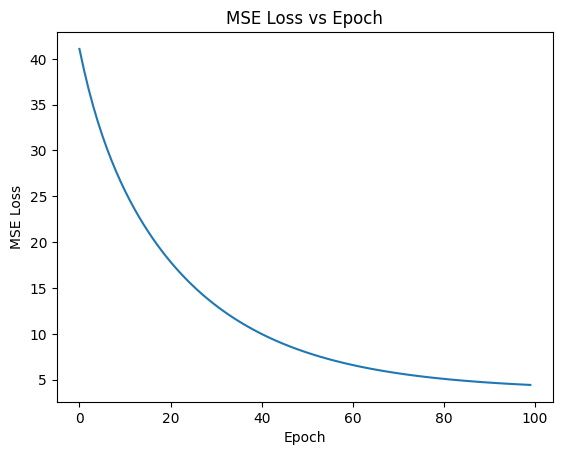

In [19]:
# Set hyperparameters
learning_rate = 0.01
num_iterations = 100
# Train the model using the function
weights, losses = batch_grad_desc(X_train, Y_train, learning_rate, num_iterations)
# Output the final learned weights and the sequence of MSE losses
print("Learned weights:", weights)
print("\nThe sequence of T MSE losses, one for each training epoch\n",losses)
print("\n")
# Plot MSE loss as a function of epoch to show training progress
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("MSE Loss vs Epoch")
plt.show()

Training with Learning Rate: 0.1
Epoch 100/3000, MSE: 3.7592531845187205
Epoch 200/3000, MSE: 3.7579326542237257
Epoch 300/3000, MSE: 3.75788862247088
Epoch 400/3000, MSE: 3.7578871415007433
Epoch 500/3000, MSE: 3.757887091688341
Epoch 600/3000, MSE: 3.7578870900129013
Epoch 700/3000, MSE: 3.757887089956548
Epoch 800/3000, MSE: 3.757887089954652
Epoch 900/3000, MSE: 3.757887089954589
Epoch 1000/3000, MSE: 3.757887089954586
Epoch 1100/3000, MSE: 3.757887089954586
Epoch 1200/3000, MSE: 3.757887089954586
Epoch 1300/3000, MSE: 3.757887089954586
Epoch 1400/3000, MSE: 3.7578870899545866
Epoch 1500/3000, MSE: 3.757887089954586
Epoch 1600/3000, MSE: 3.757887089954586
Epoch 1700/3000, MSE: 3.7578870899545866
Epoch 1800/3000, MSE: 3.757887089954586
Epoch 1900/3000, MSE: 3.757887089954586
Epoch 2000/3000, MSE: 3.757887089954586
Epoch 2100/3000, MSE: 3.757887089954586
Epoch 2200/3000, MSE: 3.757887089954586
Epoch 2300/3000, MSE: 3.757887089954586
Epoch 2400/3000, MSE: 3.757887089954586
Epoch 2500/

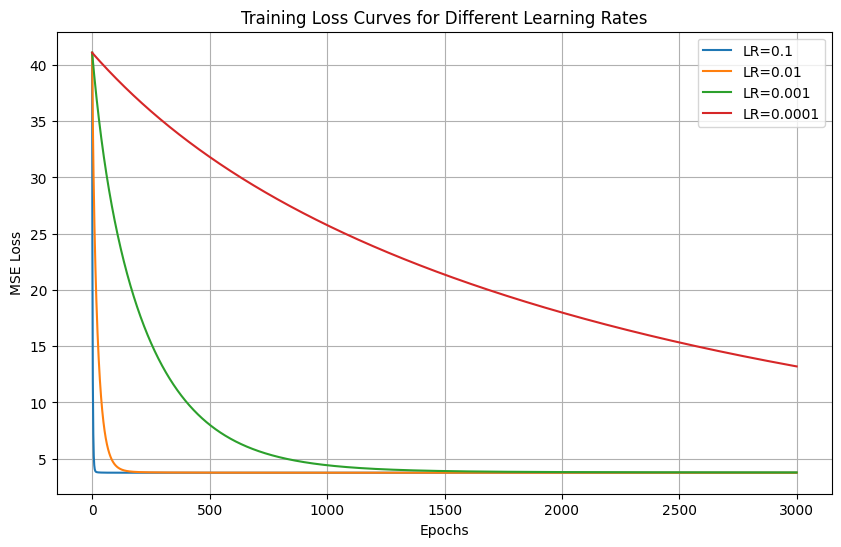

In [20]:
# Function to compute MSE on validation data
def cal_mse(X_val, Y_val, weights):
    X_val_bias = np.c_[np.ones((X_val.shape[0], 1)), X_val]  # Add bias term
    # Compute predictions on the validation data using the current weights
    y_pred_val = X_val_bias.dot(weights)
    # Calculate MSE by averaging the squared differences between predictions and actual values
    mse_val = np.mean((y_pred_val - Y_val) ** 2)
    return mse_val

# Example with provided training and validation data
def exp_with_lrates(X_train, Y_train, X_val, Y_val):
#list of learning rates to test, decreasing by a factor of 10 each time
    learning_rates = [10 ** -i for i in range(1, 5)]  # [1, 0.1, 0.01, 0.001, 0.0001] # Results in [0.1, 0.01, 0.001, 0.0001]
    # Set the total number of training iterations
    num_iterations = 3000
    all_losses = []  # losses for each learning rate
    val_mse_results = {}  # MSE on validation data
    train_mse_results = {}  # MSE on validation data

    # Loop through each learning rate to train and evaluate the model
    for lr in learning_rates:
        print(f"Training with Learning Rate: {lr}")
        # Train the model using batch gradient descent with the current learning rate
        weights, losses = batch_grad_desc(X_train, Y_train, lr, num_iterations)

        # If training diverged, losses will be None
        if losses is not None:
            all_losses.append((lr, losses))
            # Calculate final MSE on training data with the final weights
            final_weights = weights
            train_mse = cal_mse(X_train, Y_train, final_weights)
            train_mse_results[lr] = train_mse
            print(f"Final MSE on Training data for Learning Rate {lr}: {train_mse}")
             # Calculate final MSE on validation data with the final weights
            val_mse = cal_mse(X_val, Y_val, final_weights)
            val_mse_results[lr] = val_mse
            print(f"Final MSE on Validation data for Learning Rate {lr}: {val_mse}")

        else:
            print(f"Learning Rate {lr} Diverged.")

    # # Plot the training loss curves for each learning rate to see how MSE changes over epochs
    plt.figure(figsize=(10, 6))
    for lr, losses in all_losses:
        plt.plot(losses, label=f'LR={lr}')

    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title('Training Loss Curves for Different Learning Rates')
    plt.legend()
    plt.grid(True)
    plt.show()

    return train_mse_results, val_mse_results
train_mse_results, val_mse_results = exp_with_lrates(X_train, Y_train, X_val, Y_val)

You will now experiment with the batch gradient descent algorithm with different learning rate on the provided data.

Please train your model for up to 3000 iterations using different learning rate: $\gamma=10^{-i}$, $i=0,1,...,4$. For each learning rate, you can opt to stop early if it has converged (using the convergence threshold) or diverged (the loss start to grow larger).

For each converging (not necessarily converged yet) learning rate, please compute and report the MSE of the final learned weights on the validation data.

Also please provide a plot that shows the training loss curves (MSE as a function of the # of epochs) for all the converging learning rates. Please use different colors mark different learning rates and provide proper legends for your figure.


In [21]:
# Your code goes here
# Convert the training MSE results dictionary to a DataFrame
train_mse_results = pd.DataFrame.from_dict(train_mse_results, orient='index')
# Convert the validation MSE results dictionary to a DataFrame
val_mse_results = pd.DataFrame.from_dict(val_mse_results, orient='index')
mse_values = pd.concat([train_mse_results, val_mse_results], axis=1, keys=['Training MSE', 'Validation MSE'])
mse_values


,Training MSE,Validation MSE
,0,0
0.1000,3.757887,4.503508
0.0100,3.757889,4.503498
0.0010,3.781246,4.525750
0.0001,13.201072,14.465483


## Question

Which learning rate leads to the best trainng and validation MSE respectively? Do you observe better training MSE tend to correpsond to better validation MSE? How is this different from the trend shown on page 51 of the lecture slides (titled danger of using training loss to select M) regarding overfitting? Is there any issue with using training loss to pick learning rate in this case?

**Your answer goes here.**The learning rate "0.1" gave the best training MSE, while "0.01" gave the best validation MSE, as these had the lowest values compared to other learning rates. The table shows that having a lower training MSE doesn't always mean the validation MSE will also be lower. For example, "0.1" had the best training MSE, but "0.01" had the best validation MSE. Choosing the model complexity (like in Slide 51, where overfitting can happen when a complex model fits noisy data) is different from picking a learning rate based on training loss. The learning rate controls how fast the model learns during training, not how complex the model is. Using training loss to choose a learning rate can be risky because it doesn't always show how well the model will perform on new/unseen data.

# Part 3. More exploration.

## **3(a). (20 pts) Normalization of features: what is the impact?**
In part 1, you were asked to perform z-score normalization of all the features. In this part, we will ask you to first conceptually think about what is the impact this operation on the solution and then use some experiments to varify your conceptual understanding.

### **Questions.**

The normalization process applies a linear transformation to each feature, where the transformed feature $x'$ is simply a linear function of original feature $x$: $x'=\frac{x-\mu}{\sigma}$.

Let's disect the influence of this transformation on our learned linear regression model.
1. How do you think this transformation will influnce the training and validation MSE we get for the closed-form solution? Why?
2. How do you think this will change the magnitude of the weights of the learned model? Why?
3. How do you think this will change the convergence behavior of the batch gradient descent algorithm? Why?

**Your answer goes here.**

1.Normalizing features usually lowers and stabilizes the Mean Squared Error (MSE) on both training and validation datasets. When features vary widely in scale, larger-scale features can dominate the model, leading it to fit more to those features and impacting overall performance. By bringing all features to a comparable scale, normalization helps the model capture true relationships more accurately, which generally improves generalization to new data. As a result, we often see a decrease in MSE on both training and validation sets, as the model now learns from features more evenly and better fits unseen data.

2.With normalization, the learned weights typically become smaller and more uniform. When features aren’t on the same scale, the model compensates with larger weights for smaller-scale features and smaller weights for larger-scale ones to balance their influence. After normalization, features are standardized to have a mean of zero and a standard deviation of one, meaning weights no longer need to adjust for these differences. Instead, weights reflect each feature’s actual relationship with the target variable. This not only makes the weights smaller but also more meaningful and interpretable, as each weight now represents the effect of a one-standard-deviation change in its feature.

3.Normalization improves the convergence speed and stability of batch gradient descent. When features vary widely in scale, the cost function landscape becomes uneven, causing gradient descent to struggle to find an efficient path to the minimum. This often requires smaller learning rates and longer training to prevent oscillations or divergence. By normalizing the features, we make the cost function smoother, enabling gradient descent to take consistent steps across all features. This not only speeds up convergence but also allows the use of a higher learning rate, reducing the total number of iterations needed to reach an optimal solution and improving overall stability.

Now please perform the following experiments to verify your answer to the above questions.
1. Apply closed-form solution to data that did not go through the feature normalization step, and report the learned weights and the resulting training and testing MSEs.
2. Apply gradient descent algorithm to data that did not go through the feature normalization step using different learning rate. Note that the learning rate used in previous section will no longer work here. You will need to search for an appropriate learning rate to get some converging behavior. Plot your MSE loss curve as a function of the epochs once you identify a convergent learning rate.
Hint: the learning rate needs to be much, much, much, much, much smaller (think about each much as an order of manitude) than what was used in part 2). Also unless you let it run for a long time, it is unlikely to converge to the same level of loss values. So use a upper bound on the # of iterations so that it won't take forever.

In [22]:
X_train_data_before_norm = features
# Assign target (price) column from the raw training data to Y_train_data_before_no
Y_train_data_before_norm = raw_train_data['price']

In [23]:
X_val_data_before_norm = raw_val_data.drop(columns=['price'])
# Assign target (price) column from the raw val data to Y_train_data_before_no
Y_val_data_before_norm = raw_val_data['price']


In [24]:
#1 Calculate the weights using the closed-form solution

weights = closed_form_solution(X_train_data_before_norm, Y_train_data_before_norm)

# Make predictions on the Training data using weights
y_pred_train = predict(X_train_data_before_norm, weights)

# Calculate the Mean Squared Error (MSE) for the training data
mse_train = mean_squared_error(Y_train_data_before_norm, y_pred_train)

# Make predictions on the Val data using the learned weights
y_pred_val = predict(X_val_data_before_norm, weights)

# Calculate the Mean Squared Error (MSE) for the Val data
mse_val = mean_squared_error(Y_val_data_before_norm, y_pred_val)

# Output the results
print("Learned weights:\n", weights)
print("\n")
print("Predictions on training data:", y_pred_train)
print("Predictions on validation data:", y_pred_val)
print("\n")
print("Mean Squared Error on training data:", mse_train)
print("Mean Squared Error on validation data:", mse_val)

Learned weights:
 [ 1.80833192e-04 -2.94943519e-01  4.40041814e-01  9.84276546e-04
  1.34948682e-06  4.48302408e-02  4.01762152e+00  5.98760324e-01
  2.90711776e-01  9.51607375e-01  7.63596117e-04  2.20678434e-04
 -3.01274280e-02 -5.53837316e-03  6.00871554e+00 -2.13593880e+00
  1.94481319e-04 -3.43347436e-06 -2.32014598e-02 -6.96949122e-03
  2.44379941e-02 -3.16835512e-03]


Predictions on training data: [2.49062477 5.53035287 4.29078419 ... 3.99214304 5.96523822 5.35549368]
Predictions on validation data: [4.50567536 3.43241133 5.99188909 ... 8.61036987 4.14126918 4.80337562]


Mean Squared Error on training data: 3.7690052852156097
Mean Squared Error on validation data: 4.516144823146069


Epoch 100/100, MSE: 12.789386436439022
Learned weights: [ 4.63511191e-10  1.76540969e-09  1.25822869e-09  1.39762739e-06
  6.97961876e-06  7.97992247e-10  1.43120415e-11  3.07660809e-10
  1.60700416e-09  4.09049237e-09  1.17731593e-06  2.20311450e-07
  9.14444170e-07  4.54593375e-05  2.20756970e-08 -5.66477589e-08
  1.19604374e-06  5.95923608e-06  3.06360497e-09  7.13193992e-09
  9.33656417e-07  1.73029621e-08]

The sequence of Training MSE losses, one for each training epoch
 [41.079865256636495, 39.924583765487085, 38.815672505443146, 37.75126918291785, 36.72958630598624, 35.74890817978677, 34.807588022610844, 33.904045197832616, 33.036762557026144, 32.20428388980345, 31.405211476087157, 30.638203736702643, 29.90197297834086, 29.195283229100838, 28.516948160973683, 27.86582909577573, 27.240833091178885, 26.64091110362082, 26.065056225006995, 25.51230199024032, 24.981720752733597, 24.472422125173903, 23.983551482917996, 23.51428852750291, 23.063845907857075, 22.631467896894247, 22.216

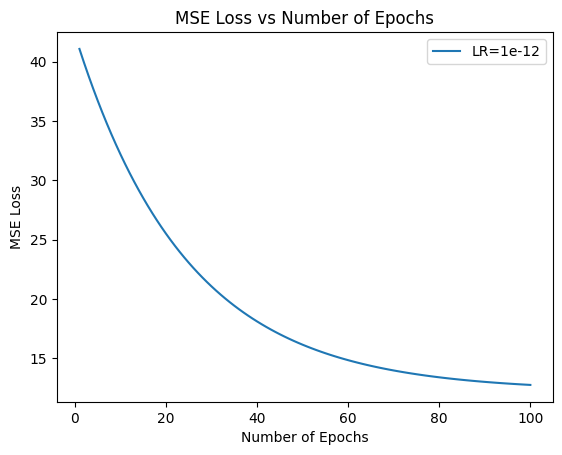

In [25]:
# 2
# set hyperparameters for training
learning_rate = 0.000000000001 # Small learning rate to control the step size in gradient descent
num_iterations = 100 # Total number of epochs (iterations) for training

# Train the model using batch gradient descent
weights, losses = batch_grad_desc(X_train_data_before_norm, Y_train_data_before_norm, learning_rate, num_iterations)
# # Output the learned weights and list of MSE losses from each epoch
print("Learned weights:", weights)
print("\nThe sequence of Training MSE losses, one for each training epoch\n",losses)
print("\n")

# Plot MSE loss as a function of epoch number
import matplotlib.pyplot as plt
epoch = range(1, 101)
plt.plot(epoch, losses, label=f'LR={0.000000000001}')
plt.xlabel("Number of Epochs")
plt.ylabel("MSE Loss")
plt.title("MSE Loss vs Number of Epochs")
plt.legend()
plt.show()

**Questions**

Please revisit the questions above. Does your experiment confirm your expectation?  Can you provide explanations to the observed differences (or lack of differences) between the normalized data and unnormalized data? Based on these observations and your understanding of them, please comment on the benefits of normalizing the input features in learning for linear regressions.


**Your answer goes here**

Yes, the experiment backs up what we expected about normalization. With normalized data, we saw lower MSE on both training and validation sets, smaller and more balanced weights, and faster convergence in gradient descent. This is because normalization scales all features evenly, so no feature overpowers the learning process. Without normalization, the model has to adjust by assigning very large or small weights, which can lead to higher MSE and less effective learning on validation data.

The benefits of normalization include more reliable model performance, clearer and more balanced weights, and improved training speed. Normalization also helps gradient descent work more efficiently by smoothing the cost function, so it finds the minimum faster and more steadily, even with higher learning rates. Overall, normalizing features in linear regression is a simple yet powerful step to improve model accuracy, interpretability, and training efficiency.

## **3(b). (20 pts) Explore the impact of correlated features**

In the warm up exercise, you all have seen some features are highly correlated with one another. For example, there are multiple squared footage related features that are strongly correlated (e.g., *sqft_above* and *sqrt_living* has a correlation coefficient of 0.878).  This is referred to as multicollinearity phenomeon, where two or more features are correlated.

There are numerous consequences from multicollinearity. It makes it more challenging to estimate the weights of the features accurately. The weights may become unstable, and their interpretation becomes less clear.

In this part you will work with the pre-processed training set, and perform the following experiments **using the closed-form solution**.
Specifically, your code should:

1. Create five slighly different training sets, each of which is obtained by randomly subsample 75% of the orginial training set.
2. Use the closed-form solution of linear regression to fit the model on each of the five training sets.
3. For each model, report the learned weight vector in a table.
The table should have five rows (one for each model) and a column for each feature’s weight. Include a header row to clearly label the feature names for each column.
4. Compute the variance of the learned weight coefficients across the five models for each feature. This variance will serve as a measure of the **stability** of the weight assigned to each feature.

In [28]:
# Your code goes here
X_train = train_data_normalized
Y_train = raw_train_data['price']

In [30]:
#generate subsamples from the training data
def gen_sub_samples(X_train, Y_train, sub_sample_ratio=0.75, num_sub_samples=5):
    sub_samples = []
    for _ in range(num_sub_samples):
        # Randomly select indices for the subsample without replacement
        sub_sample_idx = np.random.choice(len(X_train), size=int(sub_sample_ratio * len(X_train)), replace=False)
        # Collect the subsample of features and target values
        sub_samples.append((X_train.iloc[sub_sample_idx], Y_train[sub_sample_idx]))
    return sub_samples

# Compute the variance of learned weights across models
def cal_var_across_models(weight_vectors):
# Calculate the variance for each weight across the weight vectors
    return np.var(weight_vectors, axis=0)

# Generate subsamples from the normalized training data
X_train = train_data_normalized
Y_train = raw_train_data['price'].values

sub_samples = gen_sub_samples(X_train, Y_train)

#Train model on each subsample and collect the learned weights

weight_vectors = []
for i, (X_sub_sample, Y_sub_sample) in enumerate(sub_samples):
    # Train the model on the subsample using the closed-form solution
    weights = closed_form_solution(X_sub_sample, Y_sub_sample)
    weight_vectors.append(weights)

# Convert the weight vectors into a DataFrame for easy visualization
headers = train_data_normalized.columns.tolist()
W0_header= ["bias"]
headers = W0_header + headers
weights_df = pd.DataFrame(weight_vectors, columns=headers)

# Compute variance of the learned weight coefficients across the five models
weights_variance = cal_var_across_models(np.array(weight_vectors))

# Display results
# print("Learned Weight Vectors for Each Model:")
# print(weights_df)
weights_df = weights_df.T
weights_df.T


,bias,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,SaleMonth,SaleDay,SaleYear,age_since_renovated
0,5.367938,-0.391422,0.350736,0.838407,0.040446,-0.010903,0.305603,0.427494,0.200026,1.085942,...,-0.928992,-0.299532,0.830919,-0.330920,0.127267,-0.081441,0.083167,-0.047873,0.217821,-0.146850
1,5.369379,-0.250771,0.334549,0.772964,0.041275,-0.025398,0.358701,0.503477,0.198262,1.095578,...,-0.867048,-0.285976,0.869510,-0.332768,0.120802,-0.091092,0.084977,-0.062936,0.198476,-0.124555
2,5.388777,-0.306790,0.379281,0.815486,0.065600,-0.029366,0.336789,0.471252,0.210125,1.107074,...,-0.809006,-0.274317,0.858678,-0.349629,0.123345,-0.123892,0.056865,-0.034218,0.178510,-0.050428
3,5.361492,-0.270352,0.321803,0.725193,0.057240,0.075649,0.371558,0.441472,0.208793,1.128573,...,-0.892523,-0.279091,0.836907,-0.295666,0.166822,-0.081625,0.039033,-0.060588,0.184867,-0.103291
4,5.350697,-0.329937,0.396820,0.753818,0.100174,-0.007184,0.341002,0.467430,0.176141,1.098301,...,-0.762468,-0.271001,0.829793,-0.303273,0.134792,-0.134322,0.027805,-0.035436,0.141476,0.058052


In [31]:
# Create a DataFrame from the weights variance setting column names to feature headers
weights_variance_df = pd.DataFrame([weights_variance], columns=headers)
# each weight variance appear as a row, with the feature names as row labels
weights_variance_df = weights_variance_df.T
# Display the transposed DataFrame for easy inspection of each weight's variance
weights_variance_df.T


,bias,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,SaleMonth,SaleDay,SaleYear,age_since_renovated
0,0.000155,0.002423,0.000773,0.001681,0.000476,0.00148,0.000501,0.000689,0.000149,0.000208,...,0.003532,0.000102,0.000257,0.0004,0.000282,0.000496,0.000527,0.000146,0.000638,0.005343


### **Questions**

Ideally, we would like the weight coefficients to be stable across different runs, as this increases confidence in the model's reliability. Do highly correlated features tend to exhibit more instability in their weights across different training sets compared to less correlated features? Discuss any trend you observe based on the variance of the weight coefficients. How does the stability of these features relate to the multicollinearity issue present in this dataset?


**Your answer goes here.**

Weights with most stable features across different runs- grade, yr_built,zipcode,lat ,long ,bedroom ,view

Weights with least stable features across different runs- sqft_living,sqft_lot,floors

We can relate the stability of the features in relation to the multicollinearity issue we have present in this dataset. As observed in the above table, the weights are highly unstable for - sqft_living,sqft_lot,floors,making it challenging to estimate the weights of the features accurately.

# Bonus. In-class competition (5 bonus pts)

We will host a in-class competition using the IA1 data, where you are encouraged to explore different ways to improve the prediction performance by manipunating the data. This could include: feature engineering such as removing, transforming features, constructing new features based on existing ones, using different encoding for the discrete features; data manipulation such as identifying and removing potential outliers; and target manipulation such as log transforming the price target. This is where you can get creative and test your ideas out.

To participate in this competition, use the following link:
https://www.kaggle.com/t/7a885211273e48968e3a5f1b556cb685

You should continue working in the same team for this competition. The training and validation data provided on the kaggle site are the same as the IA1 assignment. To participate, you will need to train your model and apply it to testing data provided on kaggle, and submit prediction files to be scored.

Your scoring will have two parts, the performance on the public leader board as well as the private leader board. The results on the public leader board is visible through out the competition so that you can gauge how well your model is performing in comparison to others. The private leader board shows the final evaluation performance and will be released only once after the competition is closed.

Each team will be allowed to submit 3 final entries to be evaluated. You can use the public leaderboard performance to pick which models to use for your final evaluation entries.

**Assginment of the bonus points:**

**Performance bonus:** the top 3 teams on the **private** leader board will recieve 5 bonus points.

**Participation bonus:** the 5 teams that submitted the most entries (with different performances) will recieve 3 bonus points. Also any team that participated the competition and got non-trivial performance will receive 2 bonus points.

Bonus points are capped at 5.


**Please provide the team name on the kaggle competition here _________.
Leave it blank if you opt not to participate.**

In [ ]:
#running this code block will convert this notebook and its outputs into a pdf report.
!jupyter nbconvert --to html /content/gdrive/MyDrive/Colab\ Notebooks/IA1-2024.ipynb  # you might need to change this path to appropriate value to location your copy of the IA0 notebook

input_html = '/content/gdrive/MyDrive/Colab Notebooks/IA1-2024.html' #you might need to change this path accordingly
output_pdf = '/content/gdrive/MyDrive/Colab Notebooks/IA1output.pdf' #you might need to change this path or name accordingly

# Convert HTML to PDF
pdfkit.from_file(input_html, output_pdf)

# Download the generated PDF
files.download(output_pdf)